<h1 style="text-align: center;">Lab1 Project</h1>
<h1 style="text-align: center;">Coronavirus Analysis</h1>

(This project study about covid, which is one of the most infectious viruses in history)


**Member lists**

| Full Name |MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :---:
|Lâm Thị Xuân Thy|20127082|Preprocessing continents dataset|100%
|Nguyễn Huy Hoàn|20127166|Preprocessing countries dataset|100%
|Bùi Thanh Lâm|20127402|Question 1: Which countries have had high newcases recently and find the reason.|100%
|Đào Ngọc Hoa|20127500|I. Data Colection, II. Read data and preprocessing|100%
|Võ Thanh Lâm|20127546|Question 2: What are the current trends of covid pandemic among continents?|100%

<a class="anchor" id="1"></a>
## I. Collecting data 

**copy paste file crawl.ipynb this section**

## II. Data Exploration <a class="anchor" id="2"></a>
(*This process is often interleaved with preprocessing*)

**Import libraries**

In [95]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

**Read data**

In [96]:
csv_files = glob.glob("Date*.csv")
csv_files

['Date2023-02-24.csv',
 'Date2023-02-25.csv',
 'Date2023-02-26.csv',
 'Date2023-02-27.csv',
 'Date2023-02-28.csv',
 'Date2023-03-01.csv',
 'Date2023-03-02.csv',
 'Date2023-03-03.csv',
 'Date2023-03-04.csv',
 'Date2023-03-05.csv',
 'Date2023-03-06.csv',
 'Date2023-03-07.csv',
 'Date2023-03-08.csv',
 'Date2023-03-09.csv',
 'Date2023-03-10.csv']

In [97]:
df_list = (pd.read_csv(file) for file in csv_files)

In [98]:
big_df = pd.concat(df_list, ignore_index=True)

**reason for chóosing this dataset**


In [99]:
big_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\r\nAsia\r\n,"214,177,844","+34,109","1,535,995",199.0,"198,776,221","+42,580","13,865,628","15,540",NaN,NaN,NaN,NaN,NaN,Asia,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038
1,NaN,\r\nNorth America\r\n,"124,454,659","+13,166","1,609,910",100.0,"119,688,106","+39,469","3,156,643","7,752",NaN,NaN,NaN,NaN,NaN,North America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038
2,NaN,\r\nEurope\r\n,"246,116,716","+51,474","2,016,321",223.0,"241,707,445","+28,487","2,392,950","6,461",NaN,NaN,NaN,NaN,NaN,Europe,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038
3,NaN,\r\nSouth America\r\n,"67,966,089","+15,202","1,350,361",141.0,"66,204,615","+7,649","411,113","10,195",NaN,NaN,NaN,NaN,NaN,South America,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038
4,NaN,\r\nOceania\r\n,"13,987,191","+2,961","26,076",16.0,"13,826,284","+2,416","134,831",64,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,\r\n,NaN,NaN,NaN,NaN,NaN,2023-02-24 22:52:50.662038


**The number of rows and columns**

In [100]:
rows, cols = big_df.shape
rows, cols

(3705, 23)

In [101]:
# list of columns
big_df.columns


Index(['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths',
       'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests',
       'Tests/\r\n1M pop\r\n', 'Population', 'Continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop', 'Date'],
      dtype='object')

**This corona table has 247 rows and 23 columns**

|Column|Meanings
| :------ | ---
| # | Index
| Date | Date
| Country, Other | Country
| Total Cases | Total cases
| New Cases | New cases
| Total Deaths | Total deaths
| New Deaths | New deaths
| Total Recovered | Total recovered
| Active Cases | Active cases
| Serious, Critical | Serious, critical
| Tot Cases/1M pop | Total cases per 1 million population
| Deaths/1M pop | Deaths per 1 million population
| Total Tests | Total tests
| Tests/1M pop | Tests per 1 million population
| Population | Population
| Continent | Continent
| 1 Caseevery X ppl | 1 case every X people
| 1 Deathevery X ppl | 1 death every X people
| 1 Testevery X ppl | 1 test every X people
| New Cases/1M pop | New cases per 1 million population
| New Deaths/1M pop | New deaths per 1 million population
| Date | Date

In [102]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    3465 non-null   float64
 1   Country,Other        3705 non-null   object 
 2   TotalCases           3705 non-null   object 
 3   NewCases             970 non-null    object 
 4   TotalDeaths          3705 non-null   object 
 5   NewDeaths            544 non-null    float64
 6   TotalRecovered       3390 non-null   object 
 7   NewRecovered         912 non-null    object 
 8   ActiveCases          3420 non-null   object 
 9   Serious,Critical     2127 non-null   object 
 10  Tot Cases/1M pop     3465 non-null   object 
 11  Deaths/1M pop        3375 non-null   object 
 12  TotalTests           3195 non-null   object 
 13  Tests/
1M pop
     3195 non-null   object 
 14  Population           3465 non-null   object 
 15  Continent            3645 non-null   obj

*There are some columns having inappropriate data types.*

### Preprocessing

**Convert object to numeric datatypes**

In [103]:
columns = ['TotalCases', 'NewCases', 'TotalDeaths',\
       'TotalRecovered', 'NewRecovered', 'ActiveCases',\
       'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests',\
       'Population', '1 Caseevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop']

In [104]:
big_df[columns] = big_df[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [105]:
big_df.describe()

,#,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,3465.000000,3.705000e+03,970.000000,3.615000e+03,544.000000,3.390000e+03,912.000000,3.420000e+03,2127.000000,3465.000000,3375.000000,3.195000e+03,3.435000e+03,3435.000000,3345.000000,3195.000000,786.000000,374.000000,3308.000000
mean,116.000000,1.377376e+07,6609.711340,1.411563e+05,61.056985,1.436844e+07,9672.823465,4.398373e+05,1255.067701,198203.111688,1312.547852,3.260344e+07,3.469404e+07,404.198253,14464.959043,10.725509,417.851145,0.797807,28582.446493
std,66.692956,6.844099e+07,17983.099963,6.829306e+05,122.149089,6.858387e+07,25552.677733,2.421907e+06,5318.458405,200895.995963,1451.141478,1.179720e+08,1.383546e+08,4138.659291,57101.136000,26.697019,1010.199106,1.836199,91606.597997
min,1.000000,5.000000e+00,1.000000,1.000000e+00,1.000000,2.000000e+00,1.000000,0.000000e+00,0.000000,16.000000,2.000000,7.850000e+03,7.990000e+02,1.000000,153.000000,0.000000,1.000000,0.010000,1.000000
25%,58.000000,2.537500e+04,23.000000,2.270000e+02,3.000000,2.327600e+04,32.000000,5.600000e+01,4.000000,17228.000000,175.000000,3.478150e+05,4.454310e+05,3.000000,499.000000,0.000000,6.000000,0.100000,55.000000
50%,116.000000,2.510710e+05,171.000000,2.805000e+03,11.000000,3.079295e+05,263.500000,1.327000e+03,17.000000,124778.000000,818.000000,2.226216e+06,5.797805e+06,8.000000,1255.000000,1.000000,40.000000,0.400000,540.500000
75%,174.000000,2.037773e+06,3411.500000,1.987800e+04,60.500000,2.439497e+06,3696.000000,1.419900e+04,74.000000,328416.000000,2064.000000,1.303543e+07,2.210284e+07,58.000000,6120.000000,5.000000,250.000000,0.700000,3293.000000
max,231.000000,6.812958e+08,134557.000000,6.810330e+06,705.000000,6.541880e+08,177791.000000,2.044346e+07,40670.000000,874039.000000,8737.000000,1.168472e+09,1.448471e+09,62616.000000,626161.000000,196.000000,9680.000000,20.000000,611101.000000


**Convert `Date` to datatime type**

In [106]:
big_df['Date'] = pd.to_datetime(big_df['Date']).dt.date

In [107]:
big_df.to_csv('covidcases.csv',index=False)

# Countries

In [108]:
countries_df = big_df.dropna(subset=['#'])
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,NaN,5272.0,NaN,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,"110,461",1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-24
9,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,314123.0,3418.0,1.164028e+09,"3,476,731",3.348053e+08,North America,3.0,293.0,0.0,27.0,0.2,4354.0,2023-02-24
10,3.0,India,44685799,180.0,530764.0,NaN,44152945.0,106.0,2090.0,NaN,31768.0,377.0,9.183245e+08,"652,854",1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,1.0,2023-02-24
11,4.0,France,39608954,3917.0,164877.0,29.0,39374920.0,3293.0,69157.0,869.0,603938.0,2514.0,2.714902e+08,"4,139,547",6.558452e+07,Europe,2.0,398.0,0.0,60.0,0.4,1054.0,2023-02-24
12,5.0,Germany,38111063,20974.0,167812.0,89.0,37654800.0,NaN,288451.0,NaN,454333.0,2001.0,1.223324e+08,"1,458,359",8.388360e+07,Europe,2.0,500.0,1.0,250.0,1.0,3439.0,2023-02-24


**comment**

***The number of rows and columns***
- This countries table has 210 rows and 12 columns




**Values distribution of Numeric columns**

In [109]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,3465.0,1.160000e+02,6.669296e+01,1.00,58.0,116.0,174.00,2.310000e+02,0.0
TotalCases,3465.0,2.945558e+06,9.548297e+06,5.00,23948.0,206673.0,1304132.00,1.055478e+08,0.0
NewCases,786.0,1.631405e+03,3.766162e+03,1.00,16.0,103.5,618.75,3.297000e+04,77.3
TotalDeaths,3375.0,3.023881e+04,1.059505e+05,1.00,225.0,2179.0,14452.00,1.148391e+06,2.6
NewDeaths,382.0,1.739005e+01,2.801607e+01,1.00,2.0,6.0,17.00,1.580000e+02,89.0
TotalRecovered,3150.0,3.020371e+06,9.604788e+06,2.00,21596.0,235145.5,1473281.25,1.030838e+08,9.1
NewRecovered,737.0,2.399514e+03,7.113609e+03,1.00,17.0,140.0,1278.00,7.832000e+04,78.7
ActiveCases,3180.0,8.864015e+04,7.963759e+05,0.00,53.0,1053.0,10152.00,1.153536e+07,8.2
"Serious,Critical",1887.0,1.261797e+02,6.487421e+02,1.00,4.0,13.0,52.00,7.557000e+03,45.5
Tot Cases/1M pop,3435.0,1.957411e+05,1.966302e+05,16.00,17214.0,124778.0,314971.00,7.039590e+05,0.9


**comment**
- As we see the database has a lot of missing values, so we need to consider and preprocess it.

**NewCases**

In [110]:
countries_df['NewCases']=countries_df['NewCases'].fillna(0)

C:\Users\Bui Lam\AppData\Local\Temp\ipykernel_25156\1145570938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['NewCases']=countries_df['NewCases'].fillna(0)


<AxesSubplot:xlabel='NewCases', ylabel='Count'>

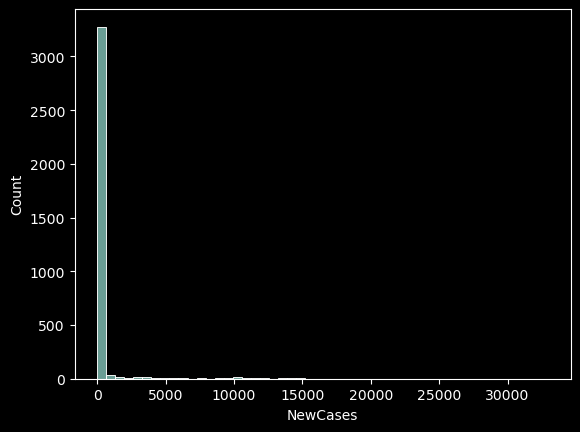

In [111]:
sns.histplot(data=countries_df, x="NewCases",bins=50)

**comment of NewCases**
- The chart show the distribution of new cases among countries
- At 27/2/2023, most countries have no new cases
=> ***This means that just a few countries have covid 19 at that moment.***

**TotalDeaths**

In [112]:
df = countries_df.loc[countries_df['TotalDeaths'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
229,222.0,Tuvalu,2805,0.0,NaN,NaN,NaN,NaN,2805.0,NaN,232471.0,NaN,NaN,NaN,12066.0,Australia/Oceania,4.0,NaN,NaN,NaN,NaN,232471.0,2023-02-24
230,223.0,Saint Helena,2166,0.0,NaN,NaN,2.0,NaN,2164.0,NaN,354211.0,NaN,NaN,NaN,6115.0,Africa,3.0,NaN,NaN,NaN,NaN,353884.0,2023-02-24
231,224.0,Falkland Islands,1930,0.0,NaN,NaN,1930.0,NaN,0.0,NaN,545352.0,NaN,8632.0,"2,439,107",3539.0,South America,2.0,NaN,0.0,NaN,NaN,NaN,2023-02-24
233,226.0,Niue,783,0.0,NaN,NaN,752.0,NaN,31.0,NaN,482737.0,NaN,NaN,NaN,1622.0,Australia/Oceania,2.0,NaN,NaN,NaN,NaN,19112.0,2023-02-24
235,228.0,Vatican City,29,0.0,NaN,NaN,29.0,NaN,0.0,NaN,36295.0,NaN,NaN,NaN,799.0,Europe,28.0,NaN,NaN,NaN,NaN,NaN,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,222.0,Saint Helena,2166,0.0,NaN,NaN,2.0,NaN,2164.0,NaN,354211.0,NaN,NaN,NaN,6115.0,Africa,3.0,NaN,NaN,NaN,NaN,353884.0,2023-03-10
3688,223.0,Falkland Islands,1930,0.0,NaN,NaN,1930.0,NaN,0.0,NaN,545352.0,NaN,8632.0,"2,439,107",3539.0,South America,2.0,NaN,0.0,NaN,NaN,NaN,2023-03-10
3690,225.0,Niue,792,0.0,NaN,NaN,790.0,NaN,2.0,NaN,488286.0,NaN,NaN,NaN,1622.0,Australia/Oceania,2.0,NaN,NaN,NaN,NaN,1233.0,2023-03-10
3692,227.0,Vatican City,29,0.0,NaN,NaN,29.0,NaN,0.0,NaN,36295.0,NaN,NaN,NaN,799.0,Europe,28.0,NaN,NaN,NaN,NaN,NaN,2023-03-10


In [113]:
df['Country,Other'].unique()

array(['Tuvalu', 'Saint Helena', 'Falkland Islands', 'Niue',
       'Vatican City', 'Tokelau'], dtype=object)

It seem that these regions do not report the `TotalDeaths`, that is because these are small islands or city. So for further analysis, we would drop these records.

In [114]:
countries_df = countries_df[countries_df['TotalDeaths'].isna()==False]

**NewDeaths**

In [115]:
countries_df['NewDeaths']=countries_df['NewDeaths'].fillna(0)

<AxesSubplot:xlabel='NewDeaths', ylabel='Count'>

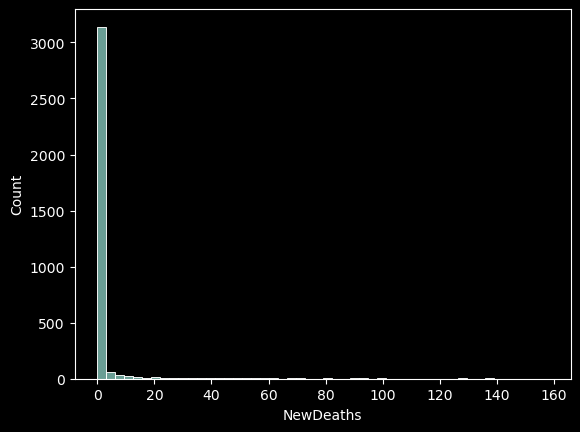

In [116]:
sns.histplot(data=countries_df, x="NewDeaths",bins=50)

**comment of NewDeaths**
- The chart show the distribution of new deaths among countries
- At 27/2/2023, most countries have no new deaths
- ***This means that covid 19 has become easier at this time.***

**TotalRecovered**

In [117]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,Turkey,17042722,0.0,101492.0,0.0,NaN,NaN,NaN,NaN,199186.0,1186.0,162743369.0,"1,902,052",85561976.0,Asia,5.0,843.0,1.0,NaN,NaN,1819.0,2023-02-24
74,67.0,Tunisia,1150793,0.0,29330.0,0.0,NaN,NaN,NaN,44.0,95528.0,2435.0,5001397.0,"415,169",12046656.0,Africa,10.0,411.0,2.0,NaN,NaN,951.0,2023-02-24
86,79.0,Paraguay,808327,874.0,19870.0,21.0,NaN,NaN,NaN,7.0,110641.0,2720.0,2657506.0,"363,751",7305843.0,South America,9.0,368.0,3.0,120.0,3.0,12338.0,2023-02-24
102,95.0,Honduras,471557,0.0,11109.0,0.0,NaN,NaN,NaN,105.0,46135.0,1087.0,1626616.0,"159,141",10221247.0,North America,22.0,920.0,6.0,NaN,NaN,32081.0,2023-02-24
119,112.0,Martinique,229807,0.0,1098.0,0.0,NaN,NaN,NaN,12.0,614314.0,2935.0,828928.0,"2,215,870",374087.0,North America,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,172.0,Solomon Islands,24575,0.0,153.0,0.0,NaN,NaN,NaN,1.0,34077.0,212.0,NaN,NaN,721159.0,Australia/Oceania,29.0,4713.0,NaN,NaN,NaN,11183.0,2023-03-10
3638,173.0,Micronesia,23948,0.0,61.0,0.0,NaN,NaN,NaN,1.0,203832.0,519.0,54967.0,"467,848",117489.0,Australia/Oceania,5.0,1926.0,2.0,NaN,NaN,140183.0,2023-03-10
3671,206.0,Sierra Leone,7760,0.0,126.0,0.0,NaN,NaN,NaN,NaN,934.0,15.0,259958.0,"31,296",8306436.0,Africa,1070.0,65924.0,32.0,NaN,NaN,330.0,2023-03-10
3673,208.0,British Virgin Islands,7305,0.0,64.0,0.0,NaN,NaN,NaN,NaN,238757.0,2092.0,107339.0,"3,508,269",30596.0,North America,4.0,478.0,0.0,NaN,NaN,392.0,2023-03-10


We can fill these null value by this fomula: 

$$TotalRecovered=TotalCases-TotalDeaths-ActiveCases$$

However, these countries do not report ActiveCases too. Fortunately, we know `Active Cases/1M pop`, so we can find `ActiveCases` by this equation: 

$$ActiveCases=Active Cases/1M pop*Population/1000000$$

**ActiveCases**

In [118]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'ActiveCases']=round(df['Active Cases/1M pop']*df['Population']/1000000,1)
countries_df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,0.0,5272.0,0.0,379053.0,NaN,118977.0,7557.0,347.0,4.0,1.600000e+08,"110,461",1.448471e+09,Asia,2878.0,274748.0,9.0,NaN,NaN,82.0,2023-02-24
9,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,314123.0,3418.0,1.164028e+09,"3,476,731",3.348053e+08,North America,3.0,293.0,0.0,27.0,0.2,4354.0,2023-02-24
10,3.0,India,44685799,180.0,530764.0,0.0,44152945.0,106.0,2090.0,NaN,31768.0,377.0,9.183245e+08,"652,854",1.406632e+09,Asia,31.0,2650.0,2.0,1.0,NaN,1.0,2023-02-24
11,4.0,France,39608954,3917.0,164877.0,29.0,39374920.0,3293.0,69157.0,869.0,603938.0,2514.0,2.714902e+08,"4,139,547",6.558452e+07,Europe,2.0,398.0,0.0,60.0,0.4,1054.0,2023-02-24
12,5.0,Germany,38111063,20974.0,167812.0,89.0,37654800.0,NaN,288451.0,NaN,454333.0,2001.0,1.223324e+08,"1,458,359",8.388360e+07,Europe,2.0,500.0,1.0,250.0,1.0,3439.0,2023-02-24


In [119]:
df = countries_df.loc[countries_df['TotalRecovered'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
19,12.0,Turkey,17042722,0.0,101492.0,0.0,NaN,NaN,155637.2,NaN,199186.0,1186.0,162743369.0,"1,902,052",85561976.0,Asia,5.0,843.0,1.0,NaN,NaN,1819.0,2023-02-24
74,67.0,Tunisia,1150793,0.0,29330.0,0.0,NaN,NaN,11456.4,44.0,95528.0,2435.0,5001397.0,"415,169",12046656.0,Africa,10.0,411.0,2.0,NaN,NaN,951.0,2023-02-24
86,79.0,Paraguay,808327,874.0,19870.0,21.0,NaN,NaN,90139.5,7.0,110641.0,2720.0,2657506.0,"363,751",7305843.0,South America,9.0,368.0,3.0,120.0,3.0,12338.0,2023-02-24
102,95.0,Honduras,471557,0.0,11109.0,0.0,NaN,NaN,327907.8,105.0,46135.0,1087.0,1626616.0,"159,141",10221247.0,North America,22.0,920.0,6.0,NaN,NaN,32081.0,2023-02-24
119,112.0,Martinique,229807,0.0,1098.0,0.0,NaN,NaN,228604.9,12.0,614314.0,2935.0,828928.0,"2,215,870",374087.0,North America,2.0,341.0,0.0,NaN,NaN,611101.0,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,172.0,Solomon Islands,24575,0.0,153.0,0.0,NaN,NaN,8064.7,1.0,34077.0,212.0,NaN,NaN,721159.0,Australia/Oceania,29.0,4713.0,NaN,NaN,NaN,11183.0,2023-03-10
3638,173.0,Micronesia,23948,0.0,61.0,0.0,NaN,NaN,16470.0,1.0,203832.0,519.0,54967.0,"467,848",117489.0,Australia/Oceania,5.0,1926.0,2.0,NaN,NaN,140183.0,2023-03-10
3671,206.0,Sierra Leone,7760,0.0,126.0,0.0,NaN,NaN,2741.1,NaN,934.0,15.0,259958.0,"31,296",8306436.0,Africa,1070.0,65924.0,32.0,NaN,NaN,330.0,2023-03-10
3673,208.0,British Virgin Islands,7305,0.0,64.0,0.0,NaN,NaN,12.0,NaN,238757.0,2092.0,107339.0,"3,508,269",30596.0,North America,4.0,478.0,0.0,NaN,NaN,392.0,2023-03-10


In [120]:
countries_df.loc[countries_df['TotalRecovered'].isna(), 'TotalRecovered']=df['TotalCases']-df['TotalDeaths']-df['ActiveCases']

<AxesSubplot:xlabel='ActiveCases', ylabel='Count'>

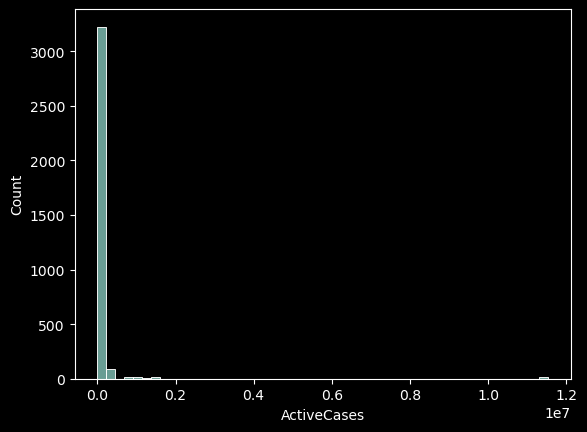

In [121]:
sns.histplot(data=countries_df, x="ActiveCases",bins=50)

**comment of ActiveCases**
- The chart show the distribution of active cases among countries
- Because of low risks the number of zero active cases is popular among countries.

**NewRecovered**

In [122]:
countries_df['NewRecovered']=countries_df['NewRecovered'].fillna(0)

<AxesSubplot:xlabel='NewRecovered', ylabel='Count'>

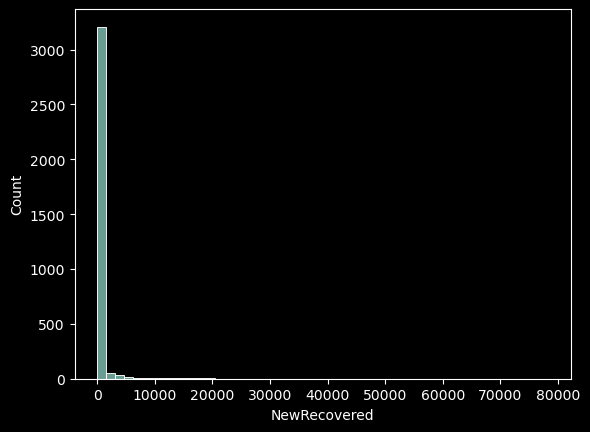

In [123]:
sns.histplot(data=countries_df, x="NewRecovered",bins=50)

**comment of NewRecovered**
- The chart show the distribution of new recovered among countries
- At 27/2/2023, most countries have no new recovered
- ***This means that just a few countries have covid 19 at that moment.***


**Serious,Critical**

In [124]:
countries_df['Serious,Critical']=countries_df['Serious,Critical'].fillna(0)

<AxesSubplot:xlabel='Serious,Critical', ylabel='Count'>

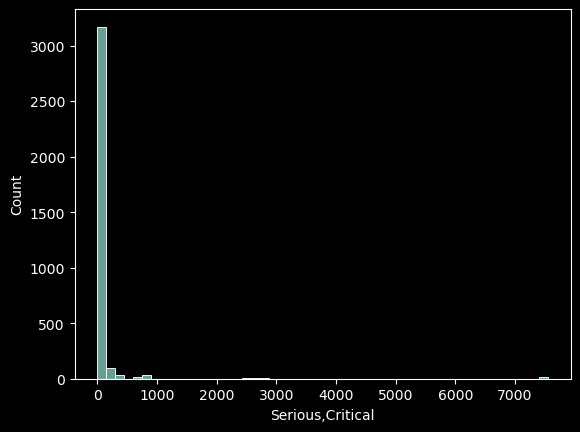

In [125]:
sns.histplot(data=countries_df, x="Serious,Critical",bins=50)

**comment of Serious,Critical**
- The chart show the distribution of serious, critical among countries
- At 27/2/2023, most countries have no serious, critical
- ***This means that just a few countries have covid 19 at that moment.***


**TotalTests**

In [126]:
df = countries_df.loc[countries_df['TotalTests'].isna()]
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
38,31.0,DPRK,4772813,0.0,74.0,0.0,4772739.0,0.0,0.0,0.0,183636.0,3.0,NaN,NaN,25990679.0,Asia,5.0,351225.0,NaN,NaN,NaN,NaN,2023-02-24
146,139.0,French Polynesia,77957,0.0,649.0,0.0,33500.1,0.0,43807.9,7.0,274338.0,2284.0,NaN,NaN,284164.0,Australia/Oceania,4.0,438.0,NaN,NaN,NaN,154164.0,2023-02-24
158,151.0,Seychelles,50665,0.0,172.0,0.0,50440.0,0.0,53.0,0.0,509575.0,1730.0,NaN,NaN,99426.0,Africa,2.0,578.0,NaN,NaN,NaN,533.0,2023-02-24
164,157.0,Tanzania,42823,0.0,846.0,0.0,200.0,0.0,41777.0,7.0,677.0,13.0,NaN,NaN,63298550.0,Africa,1478.0,74821.0,NaN,NaN,NaN,660.0,2023-02-24
180,173.0,Solomon Islands,24575,0.0,153.0,0.0,16357.3,0.0,8064.7,1.0,34077.0,212.0,NaN,NaN,721159.0,Australia/Oceania,29.0,4713.0,NaN,NaN,NaN,11183.0,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,203.0,Comoros,9008,0.0,161.0,0.0,8838.0,0.0,9.0,0.0,9927.0,177.0,NaN,NaN,907419.0,Africa,101.0,5636.0,NaN,NaN,NaN,10.0,2023-03-10
3681,216.0,Kiribati,5014,0.0,18.0,0.0,2703.0,0.0,2293.0,3.0,40626.0,146.0,NaN,NaN,123419.0,Australia/Oceania,25.0,6857.0,NaN,NaN,NaN,18579.0,2023-03-10
3691,226.0,Diamond Princess,712,0.0,13.0,0.0,699.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-10
3693,228.0,Western Sahara,10,0.0,1.0,0.0,9.0,0.0,0.0,0.0,16.0,2.0,NaN,NaN,626161.0,Africa,62616.0,626161.0,NaN,NaN,NaN,NaN,2023-03-10


It is easy to recognize that all of countries are isolated due to polital conditions, war, poverty or isolation. For instance, `Diamond Princess` and `MS Zaandam` are luxury cruise ships, which had experienced a big virus transmission at the early stage of the Covid-19 pandemic. For further analysis, we would drop these records.

In [127]:
countries_df = countries_df[countries_df['TotalTests'].isna()==False]

**Population**

<AxesSubplot:xlabel='Population', ylabel='Count'>

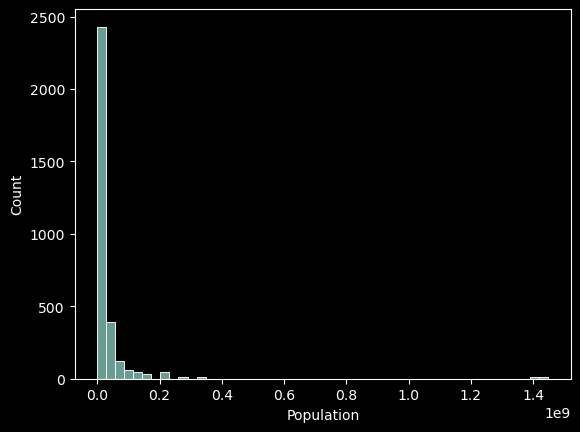

In [128]:
sns.histplot(data=countries_df, x="Population",bins=50)

**comment of Population**
- The chart show the distribution of population among countries

**New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**

In [129]:
columns = ['New Cases/1M pop','New Deaths/1M pop','Active Cases/1M pop']

In [130]:
countries_df[columns]=countries_df[columns].fillna(0)

<AxesSubplot:xlabel='New Cases/1M pop', ylabel='Count'>

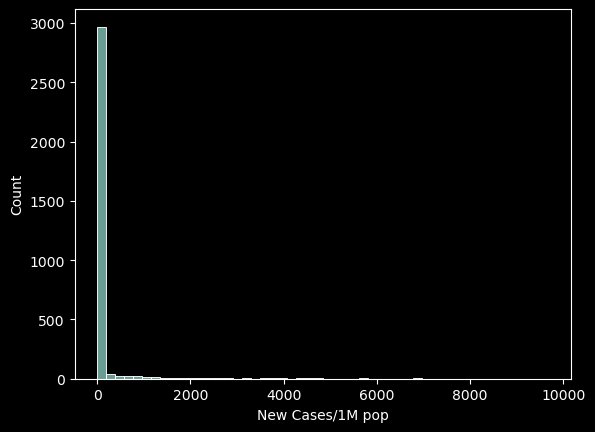

In [131]:
sns.histplot(data=countries_df, x="New Cases/1M pop",bins=50)

**comment of New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop**
-  The chart show the distribution of new cases/1M pop, new deaths/1M pop, active cases/1M pop among countries
- At 27/2/2023, most countries have no new cases/1M pop, new deaths/1M pop, active cases/1M pop
- ***This means that just a few countries have covid 19 at that moment.***


<AxesSubplot:xlabel='New Deaths/1M pop', ylabel='Count'>

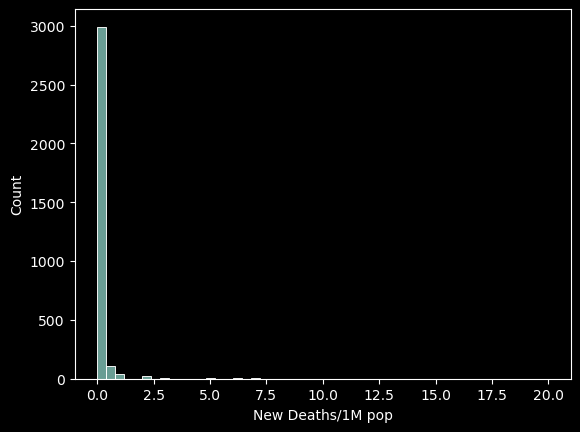

In [132]:
sns.histplot(data=countries_df, x="New Deaths/1M pop",bins=50)

**1 Caseevery X ppl, 1 Deathevery X ppl, 1 Testevery X ppl**
- The chart show the distribution of 1 case every X ppl, 1 death every X ppl, 1 test every X ppl in the world. The most 1 case every X ppl, 1 death every X ppl, 1 test every X ppl are in the range of 0-1000

<AxesSubplot:xlabel='Active Cases/1M pop', ylabel='Count'>

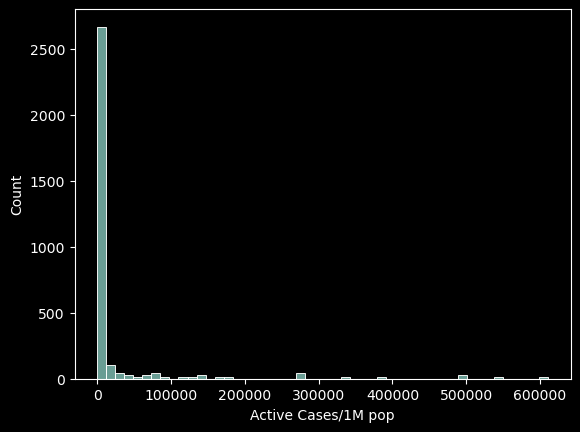

In [133]:
sns.histplot(data=countries_df, x="Active Cases/1M pop",bins=50)

It is awesome that there are no missing value now.

In [134]:
df = countries_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(countries_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,3180.0,1.091075e+02,6.373585e+01,1.0,54.75,107.5,163.25,2.310000e+02,0.0
TotalCases,3180.0,3.185758e+06,9.926758e+06,1403.0,36815.75,269017.0,1467449.25,1.055478e+08,0.0
NewCases,3180.0,4.031553e+02,1.999486e+03,0.0,0.00,0.0,0.00,3.297000e+04,0.0
TotalDeaths,3180.0,3.208149e+04,1.088820e+05,1.0,295.00,2871.0,16863.75,1.148391e+06,0.0
NewDeaths,3180.0,2.088994e+00,1.122690e+01,0.0,0.00,0.0,0.00,1.580000e+02,0.0
TotalRecovered,3180.0,3.058123e+06,9.607078e+06,104.1,25486.50,242543.5,1457656.50,1.030838e+08,0.0
NewRecovered,3180.0,5.561038e+02,3.569475e+03,0.0,0.00,0.0,0.00,7.832000e+04,0.0
ActiveCases,3180.0,9.555603e+04,7.964561e+05,0.0,84.00,1868.0,14555.75,1.153536e+07,0.0
"Serious,Critical",3180.0,7.478962e+01,5.035290e+02,0.0,0.00,2.0,20.00,7.557000e+03,0.0
Tot Cases/1M pop,3180.0,1.973997e+05,1.968245e+05,347.0,18550.25,129079.0,318542.25,7.039590e+05,0.0


**Values distribution of Catergorial columns**

In [135]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = countries_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(countries_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,"Country,Other",Tests/\r\n1M pop\r\n,Continent,Date
missing_percentage,0.0,0.0,0.0,0.0
num_values,212,563,6,15
value_percentages,"{'China': 0.5, 'Malawi': 0.5, 'Suriname': 0.5, 'New Caledonia': 0.5, 'Eswatini': 0.5, 'Guyana': ...","{'110,461': 0.5, '198,199': 0.5, '8,890': 0.5, '64,946': 0.5, '30,959': 0.5, '340,182': 0.5, '88...","{'Africa': 25.0, 'Asia': 22.6, 'Europe': 22.2, 'North America': 17.9, 'South America': 6.1, 'Aus...","{2023-02-24: 6.7, 2023-02-25: 6.7, 2023-02-26: 6.7, 2023-02-27: 6.7, 2023-02-28: 6.7, 2023-03-01..."


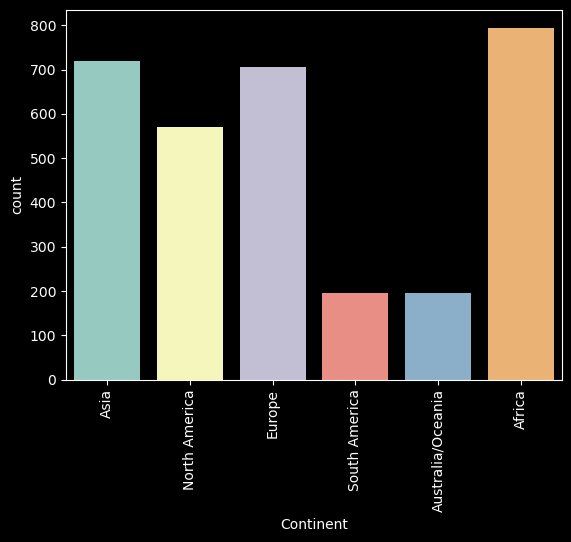

In [136]:
plt.xticks(rotation=90)
sns.countplot(x=countries_df['Continent'])
plt.show()

**conclusion of values distribution of Catergorial columns in countries**
- The chart show the number of countries in each continent
- The most countries are in Africa, so we can guess that the patients in Africa are the most.


# Continents

In [137]:
continents_df = big_df[(big_df['#'].isna())&((big_df['Country,Other']!='Total:')\
                                             &(big_df['Country,Other']!='\n\n'))&(big_df['Continent']!='All')&(big_df['Country,Other'] != '\r\n\r\n')]
continents_df


,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
0,NaN,\r\nAsia\r\n,214177844,34109.0,1535995.0,199.0,198776221.0,42580.0,13865628.0,15540.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24
1,NaN,\r\nNorth America\r\n,124454659,13166.0,1609910.0,100.0,119688106.0,39469.0,3156643.0,7752.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24
2,NaN,\r\nEurope\r\n,246116716,51474.0,2016321.0,223.0,241707445.0,28487.0,2392950.0,6461.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24
3,NaN,\r\nSouth America\r\n,67966089,15202.0,1350361.0,141.0,66204615.0,7649.0,411113.0,10195.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24
4,NaN,\r\nOceania\r\n,13987191,2961.0,26076.0,16.0,13826284.0,2416.0,134831.0,64.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3459,NaN,\r\nAsia\r\n,214668217,28619.0,1538194.0,115.0,199278965.0,20525.0,13851058.0,15539.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-10
3460,NaN,\r\nEurope\r\n,246818193,15302.0,2021620.0,54.0,242384722.0,43085.0,2411851.0,6484.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-10
3461,NaN,\r\nSouth America\r\n,68072879,NaN,1351083.0,NaN,66316323.0,110.0,405473.0,10182.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-10
3462,NaN,\r\nOceania\r\n,14027545,NaN,26221.0,NaN,13861740.0,NaN,139584.0,55.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-10


**Values distribution of Numeric columns**

In [138]:
df = continents_df.describe().T
df['missing_percentage'] = ((1-df['count']/len(continents_df)) * 100).round(1)
df

,count,mean,std,min,25%,50%,75%,max,missing_percentage
#,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
TotalCases,90.0,1.134039e+08,9.189011e+07,12791178.0,14015805.00,96263769.0,214424216.5,246818193.0,0.0
NewCases,77.0,1.665304e+04,1.672066e+04,1.0,1301.00,13672.0,29055.0,58588.0,14.4
TotalDeaths,90.0,1.133953e+06,7.360720e+05,26076.0,258590.00,1443539.0,1612364.0,2021620.0,0.0
NewDeaths,66.0,1.006515e+02,8.179684e+01,1.0,19.25,87.5,169.5,297.0,26.7
TotalRecovered,90.0,1.088745e+08,8.824125e+07,12074525.0,13852354.00,93002214.5,199046583.5,242384722.0,0.0
NewRecovered,79.0,2.235977e+04,2.249691e+04,1.0,1040.00,20525.0,38937.0,86931.0,12.2
ActiveCases,90.0,3.395466e+06,4.827495e+06,134825.0,399027.75,1425831.0,3100661.0,13865628.0,0.0
"Serious,Critical",90.0,6.753967e+03,5.397759e+03,55.0,548.00,7022.5,10187.5,15548.0,0.0
Tot Cases/1M pop,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


**Drop unrelevant or null columns**

In [139]:
cols = ['#','Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests','Country,Other',\
       'Population', '1 Caseevery X ppl','1 Testevery X ppl',\
       '1 Deathevery X ppl', 'New Cases/1M pop', 'Active Cases/1M pop','New Deaths/1M pop','Date']
# drop unrelevant columns
continents_df =continents_df.drop(columns=cols,axis=1)
continents_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tests/\r\n1M pop\r\n,Continent
0,214177844,34109.0,1535995.0,199.0,198776221.0,42580.0,13865628.0,15540.0,NaN,Asia
1,124454659,13166.0,1609910.0,100.0,119688106.0,39469.0,3156643.0,7752.0,NaN,North America
2,246116716,51474.0,2016321.0,223.0,241707445.0,28487.0,2392950.0,6461.0,NaN,Europe
3,67966089,15202.0,1350361.0,141.0,66204615.0,7649.0,411113.0,10195.0,NaN,South America
4,13987191,2961.0,26076.0,16.0,13826284.0,2416.0,134831.0,64.0,NaN,Australia/Oceania
...,...,...,...,...,...,...,...,...,...,...
3459,214668217,28619.0,1538194.0,115.0,199278965.0,20525.0,13851058.0,15539.0,NaN,Asia
3460,246818193,15302.0,2021620.0,54.0,242384722.0,43085.0,2411851.0,6484.0,NaN,Europe
3461,68072879,NaN,1351083.0,NaN,66316323.0,110.0,405473.0,10182.0,NaN,South America
3462,14027545,NaN,26221.0,NaN,13861740.0,NaN,139584.0,55.0,NaN,Australia/Oceania


**TotalTests**

In [140]:
df=countries_df.groupby(['Continent']).TotalTests.sum().reset_index()
continents_df = continents_df.merge(df,on='Continent',how='left')

**Population**

In [141]:
df=countries_df.groupby(['Continent']).Population.sum().reset_index()
continents_df = continents_df.merge(df,on='Continent',how='left')

**Values distribution of Catergorial columns**

In [142]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = continents_df.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(continents_df)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Tests/\r\n1M pop\r\n,Continent
missing_percentage,100.0,0.0
num_values,0,6
value_percentages,{},"{'Asia': 16.7, 'North America': 16.7, 'Europe': 16.7, 'South America': 16.7, 'Australia/Oceania'..."


<a class="anchor" id="3.2"></a>
## Question:<center>**What is the different picture of covid pandemic between continents?**</center>

**Introduction:**
- The COVID-19 pandemic has affected people all around the world, but the impact of the pandemic has varied between continents. Different continents have experienced varying levels of infection rates, mortality rates, and vaccination rates, due to a range of factors such as differences in population density, age demographics, healthcare systems, and access to vaccines. In this context, it is important to examine the different pictures of the pandemic across continents to better understand the current global situation. 

**Step summary:**
1. **General situation analysis ('TotalCases','TotalRecovered','TotalTests','TotalDeaths')**
2. **Background analysis (Population)**
3. **Current situation analysis ('NewCases','NewDeaths','NewRecovered','Serious,Critical')**
4. **Activecase analysis**
4. **Conclusion**

Let's warm up with a simple question

### General picture analysis

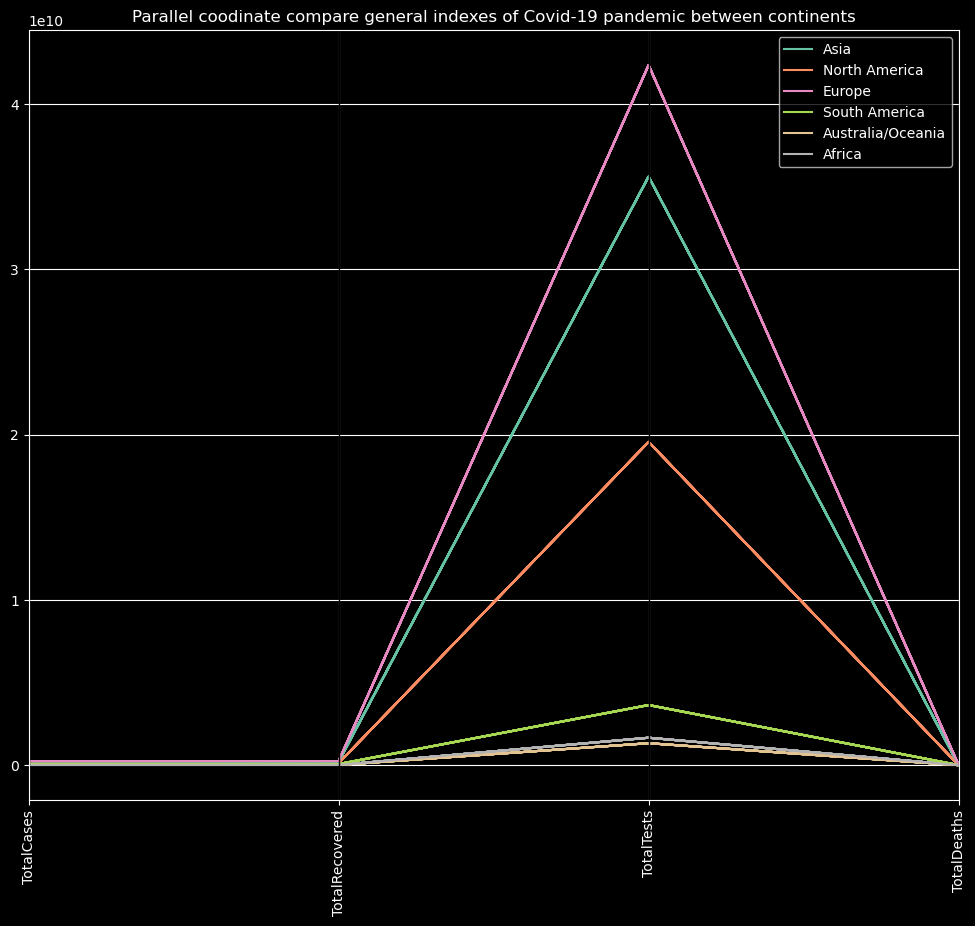

In [143]:
df = continents_df[['Continent','TotalCases','TotalRecovered','TotalTests','TotalDeaths']]

plt.figure(figsize=(12, 10))
parallel_coordinates(df,'Continent', colormap=plt.get_cmap("Set2"))
plt.title('Parallel coodinate compare general indexes of Covid-19 pandemic between continents')
plt.xticks(rotation=90)
plt.show()

**Comment**

- It is easy to see that Europe have the highest value in all figures, whereas the second place is the Asia. It seems that Europe and Asia have experienced more serious situation than others. 
- What stands out from the diagram is that the total deaths was significantly smaller than the total cases, while the number of residents who have tested was considerably larger than that of being infected. The total recovered was approximately equal to the total cases.

**TotalCases**

Now, let's see if we change our view of TotalCases.

In [144]:
df = countries_df.groupby('Continent').TotalCases.sum()
df

Continent
Africa                190364773
Asia                 3144523684
Australia/Oceania     208226047
Europe               3697037577
North America        1870173338
South America        1020385009
Name: TotalCases, dtype: int64

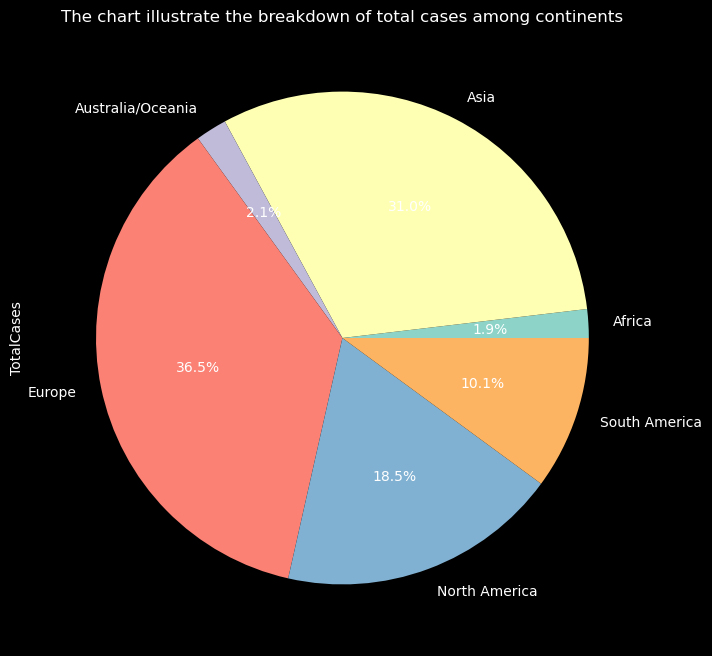

In [145]:
plt.figure(figsize=(10, 8))
plt.title('The chart illustrate the breakdown of total cases among continents')
df.plot.pie(autopct="%.1f%%");

**comment of TotalCases**

- Most of Covid cases are in Europe, which made up for over a third of totalcases worldwide, while the Asia just take over 31.0%.
- Africa had the smallest proportion, just 1.9%, compared to 2.1% of Australia/Oceania.

**Population analysis**

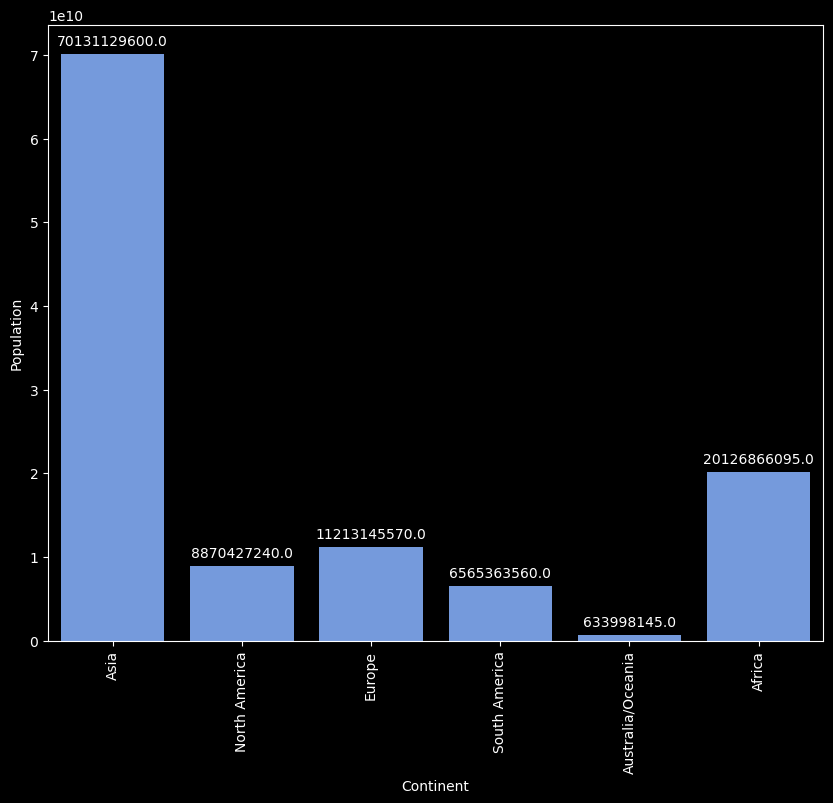

In [146]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='Population', data=continents_df,color = '#6495ED')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

**Comment of population**
- Although Europe made up the largest proportion of Covid-19 cases, at 36%, all of us know that the most densely populated continent is Asia. This means that Europe underwent more severe pandemic than Asia. So now the question is **whether Europe was the continents having the highest covid-19 infection rate?**

In [147]:
continents_df['TotalCases/Population']=continents_df['TotalCases']/continents_df['Population']*100
continents_df['TotalCases/Population']

0     0.305396
1     1.403029
2     2.194895
3     1.035222
4     2.206188
        ...   
85    0.306095
86    2.201150
87    1.036849
88    2.212553
89    0.063595
Name: TotalCases/Population, Length: 90, dtype: float64

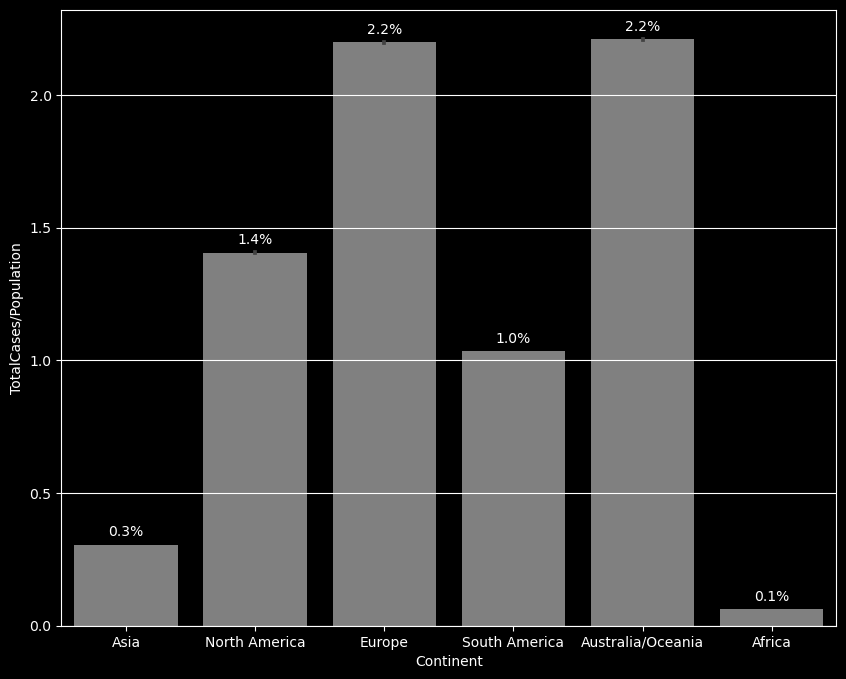

In [148]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalCases/Population'])) else 'orange' \
        for x in continents_df['TotalCases/Population']]
splot=sns.barplot(x="Continent", y='TotalCases/Population', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

- It is surprising that not Europe, Australia was the continent having the highest value of TotalCases/Population, although it has the lightest population in the world. The Covid-19 infection rate in Europe was just slightly smaller than Australia, 32.9% compare to 33.11%.
- Despite of the highest population, the infection rate of Asia is smaller than all other continents, except Africa.

**Deadth rate analysis**

Another aspect we need to consider is the deadth rates of continents. Now, let's validate again that Europe had the highest number of deaths in the world. 

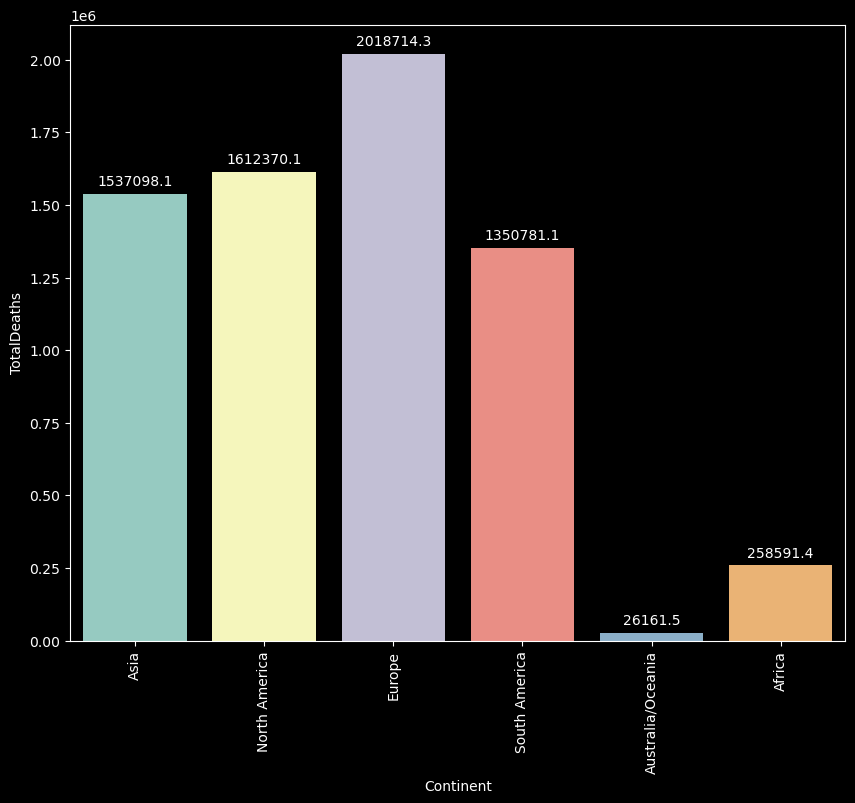

In [149]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalDeaths', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


So now, **which continents have the highest deadth rate? Is that Europe?**

In [150]:
continents_df['TotalDeaths/TotalCases']=continents_df['TotalDeaths']/continents_df['TotalCases']*100
continents_df['TotalDeaths/TotalCases']

0     0.717159
1     1.293572
2     0.819254
3     1.986816
4     0.186428
        ...   
85    0.716545
86    0.819073
87    1.984760
88    0.186925
89    2.020450
Name: TotalDeaths/TotalCases, Length: 90, dtype: float64

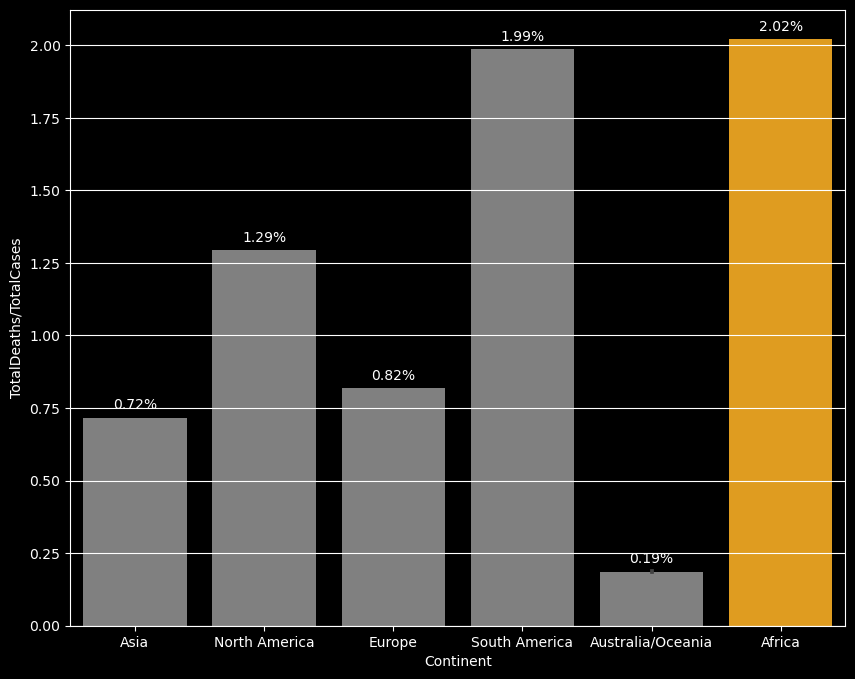

In [151]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalDeaths/TotalCases'])) else 'orange' \
        for x in continents_df['TotalDeaths/TotalCases']]
splot=sns.barplot(x="Continent", y='TotalDeaths/TotalCases', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

**Comment**
- It is interesting that although Europe seems having the worst situation, its deadth rate was just over a third of Africa, which was the highest deadth rate. South America was modestly smaller, 1.99% compared to 2.02%.
- Inspite of having the highest infection rate, Australia had the smallest deadth rate in our planet.

**Recovered rate analysis**

In [152]:
df = countries_df.groupby('Continent').TotalRecovered.sum()
df

Continent
Africa               1.802487e+08
Asia                 2.913910e+09
Australia/Oceania    2.066470e+08
Europe               3.630431e+09
North America        1.799464e+09
South America        9.941305e+08
Name: TotalRecovered, dtype: float64

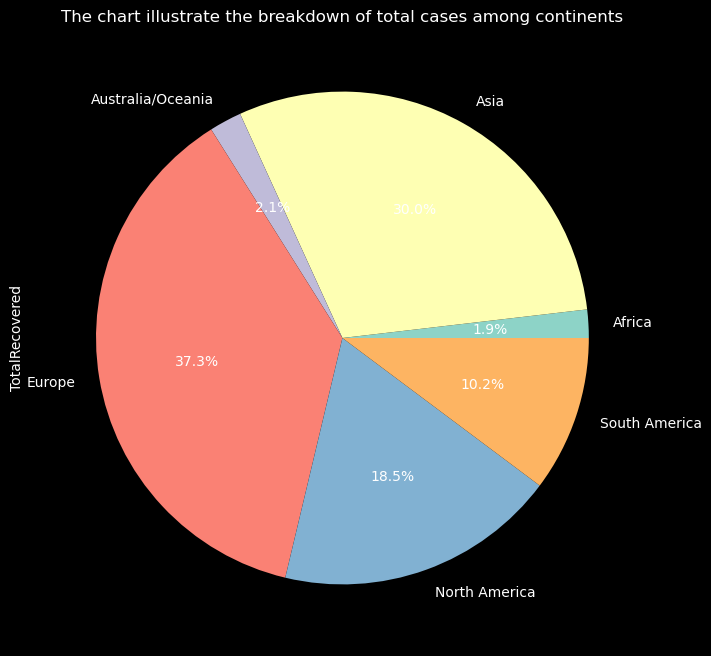

In [153]:
plt.figure(figsize=(10, 8))
plt.title('The chart illustrate the breakdown of total cases among continents')
df.plot.pie(autopct="%.1f%%");

From the pie chart, Europe was continually the continent which accounted for the largest breakdown of recovered patients, and Asia standed at the second place.

In [154]:
continents_df['TotalRecovered/TotalCases']=continents_df['TotalRecovered']/continents_df['TotalCases']*100
continents_df['TotalRecovered/TotalCases']

0     92.808956
1     96.170049
2     98.208463
3     97.408305
4     98.849612
        ...    
85    92.831146
86    98.203750
87    97.419595
88    98.818004
89    94.356320
Name: TotalRecovered/TotalCases, Length: 90, dtype: float64

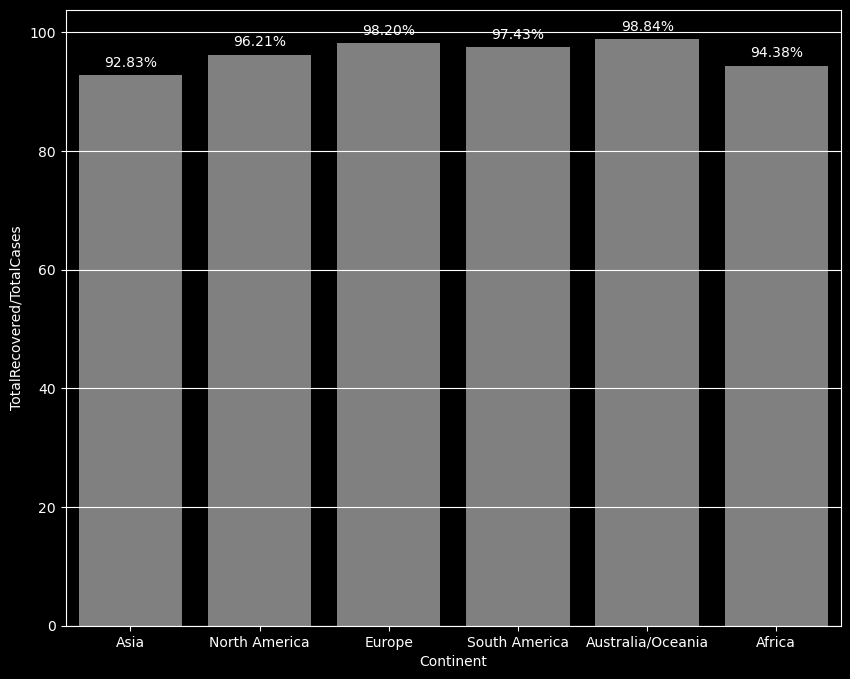

In [155]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalRecovered/TotalCases'])) else 'orange' \
        for x in continents_df['TotalRecovered/TotalCases']]
splot=sns.barplot(x="Continent", y='TotalRecovered/TotalCases', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

- Although death rate and infection rate of Asia was better than most other continents, its recovered rate was not so impressive, just 92.83%. While Australia was the best again, at 98.84%, compare to 98.21% of Europe.

**TotalTests**

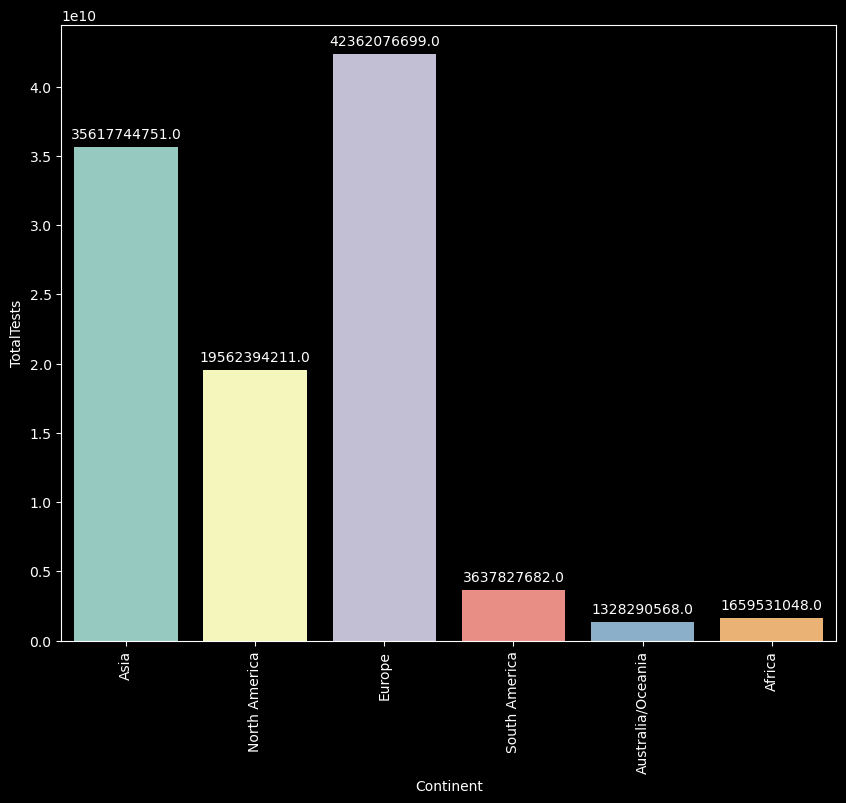

In [156]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='TotalTests', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**Comment**
- Overall, the total tests still remain the indentical rank to other indexes. **Does this make we believe that Europe is the best in finding covid cases?**

In [157]:
continents_df['TotalCases/TotalTests']=continents_df['TotalCases']/continents_df['TotalTests']*100
continents_df['TotalCases/TotalTests']

0     0.601323
1     0.636193
2     0.580984
3     1.868315
4     1.053022
        ...   
85    0.602700
86    0.582640
87    1.871251
88    1.056060
89    0.771280
Name: TotalCases/TotalTests, Length: 90, dtype: float64

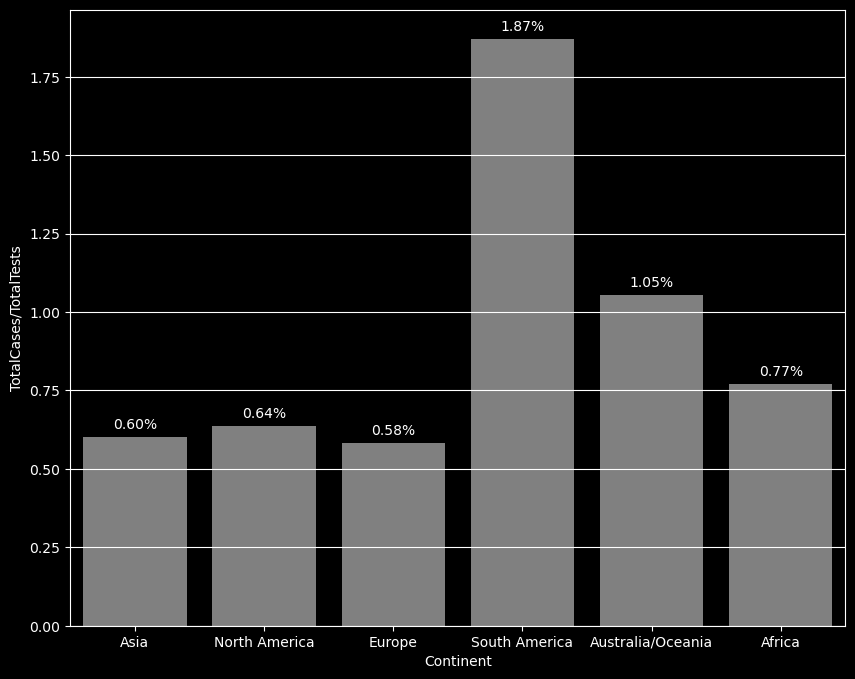

In [158]:
# bar chart
plt.figure(figsize=(10, 8))
plt.grid()
cols = ['grey' if (x != max(continents_df['TotalCases/TotalTests'])) else 'orange' \
        for x in continents_df['TotalCases/TotalTests']]
splot=sns.barplot(x="Continent", y='TotalCases/TotalTests', data=continents_df,
                 palette=cols)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f')+'%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

- It is interesting that the continent having the foremost detection rate was South America at 28.05%. Europe had the smallest propotion, at just 8.72%, which may be the reason why this continent experienced the worst Covid-19 outbreak.

### Current situation analysis **('NewCases','NewDeaths','NewRecovered','Serious,Critical')**

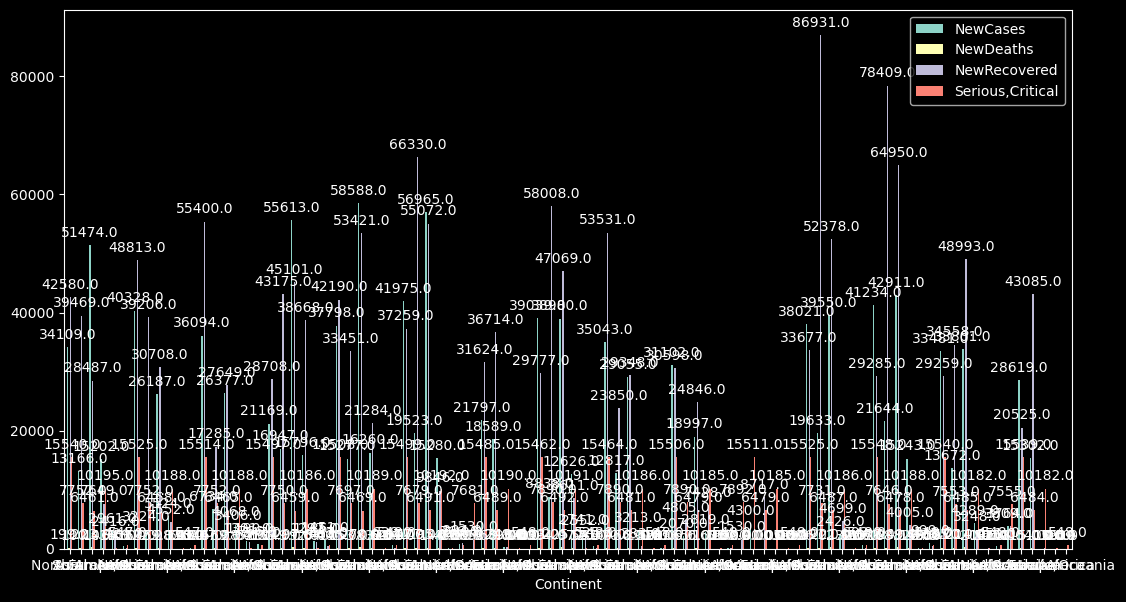

In [159]:
dfs = continents_df[['Continent', 'NewCases','NewDeaths','NewRecovered','Serious,Critical']]
dfs = dfs.set_index('Continent')
ax = dfs.plot.bar(rot = 0, width = 0.5, figsize = (13,7));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

**Comment of 'NewCases','NewDeaths','NewRecovered' and 'Serious,Critical' for Continent:**
- The number of new infections across continents is still high, with over 50,000 new cases in **Europe** being possibly the most alarming. Africa is the continent with the second-lowest number of new infections, with fewer than 1,500 cases, followed by **Oceania**. Overall, there are still steady, ongoing epidemics with new cases in the remaining nations.
- Along with the number of new infections, there are also a lot of reinfections, with **Europe** and **Africa** having the greatest and lowest rates respectively. The other continents still have high numbers, especially Europe at the top and **North America**, which despite having an average number of new cases, still has over 16,000 cases of reinfection, demonstrating the complacency in post-Covid epidemic prevention and control still has many limitations. Continents like **Africa** and **Oceania**, which have relatively good numbers at this level, are the exceptions.
- The lowest and most steady number of severe cases continues to be in **Oceania**, followed by **Africa**. With almost 15,000 cases of critically ill patients, Asia leads the way, followed by **South America**, **North America**, and **Europe**. A greater population, a higher percentage of elderly people who may be more susceptible to the disease, and other factors may be to blame for the higher number of seriously ill cases than the continent's underdeveloped medical care system.
- The death toll on continents is also still there, but the pace has drastically dropped and stabilized when computed globally. With 297 fatalities, **Europe** has the greatest rate, while **Africa** has the lowest.


**Active Case**

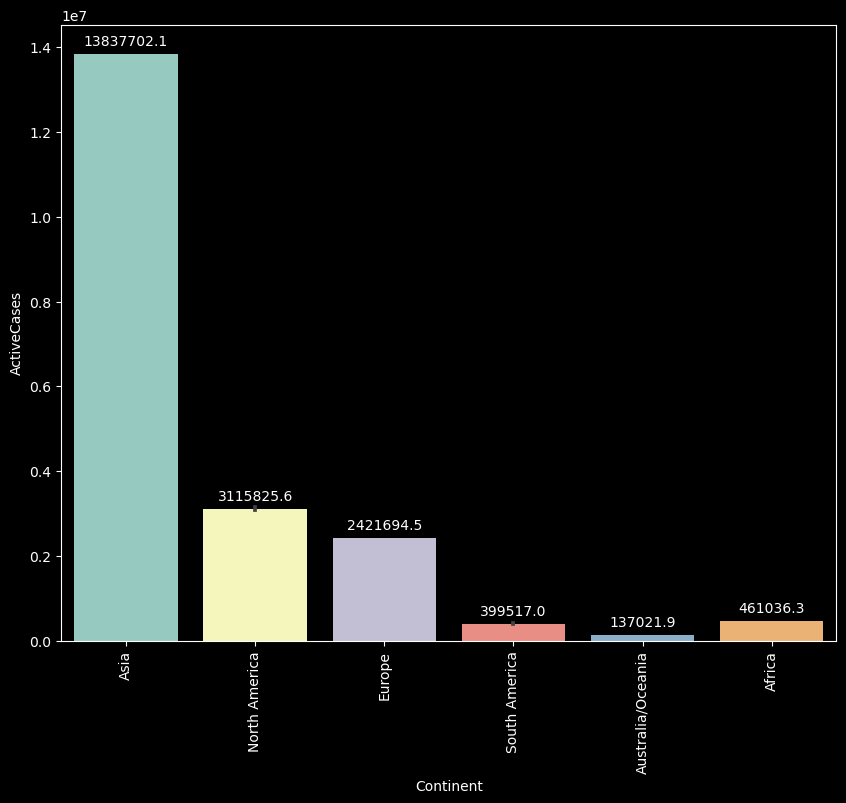

In [160]:
# bar plot
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Continent', y='ActiveCases', data=continents_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()


**Comment of Active Cases**
Looking at the data, we can make the following observations and evaluations:

- **Asia** is currently facing the most serious situation, with the highest number of cases compared to other continents, reaching 13.8 million infections. This may be related to the fact that it has a large population and many countries have underdeveloped healthcare systems to control the pandemic.

- **Europe** is third in terms of the number of infections, but is still one of the regions most affected by the pandemic, with many countries reporting high numbers of infections and deaths.

- **North America** is second in terms of the number of infections, with over 3 million cases. However, compared to Asia, the number of cases in North America is still much lower. Many countries and states in this region have implemented measures to reduce transmission and control the pandemic.

- **South America** reports a relatively low number of infections compared to other continents, with 390,050 cases. However, there are still many challenges in controlling the pandemic, especially in Brazil - the country facing a serious pandemic situation with the highest number of cases in the region.

- **Australia** and **Africa** report the lowest number of cases compared to other continents, with 135,617 and 459,995 cases respectively. However, it is important to note that controlling the pandemic in these regions also depends on many factors such as government policies, the average age of the population, healthcare infrastructure, and measures to prevent and control the spread of the virus.


### **Model**
- We use Linear Regression for this data. 

### <Center>**SO WHAT ABOUT THE COUNTRIES ?**<Center>
The issue at the continents has been visualized as above based on detailed indices, so how about specifically in countries on the continent? Here, the group decides to use a linear regression model to linearly represent the data using two columns of data, **'TotalCases'** and **'TotalRecovered'**, to evaluate the recovery level after the pandemic in each country.

In [161]:
data_test = countries_df[['TotalCases','TotalRecovered']]

In [162]:
data_test

,TotalCases,TotalRecovered
8,503302,379053.0
9,105169945,102567861.0
10,44685799,44152945.0
11,39608954,39374920.0
12,38111063,37654800.0
...,...,...
3683,3514,3392.0
3684,3452,2449.0
3685,3427,438.0
3689,1403,1376.0


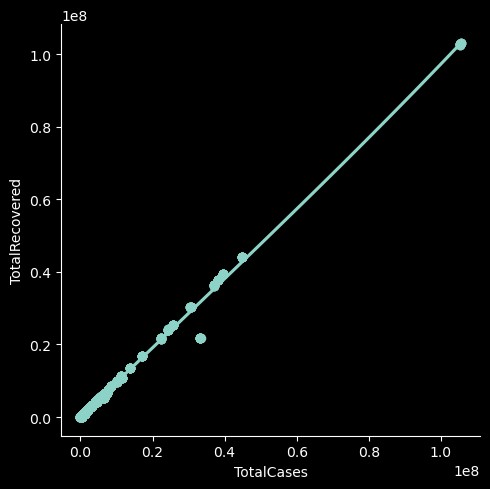

In [163]:
sns.lmplot(x ="TotalCases", y ="TotalRecovered", data = data_test, order = 3, ci = None)

In [164]:
X = np.array(data_test['TotalCases']).reshape(-1, 1)
y = np.array(data_test['TotalRecovered']).reshape(-1, 1)

For this dataset, it will be split into 75% of the data for training and 25% of the data for testing.

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [166]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9927227884655727


We can see that the evaluation level of this linear regression model for the dataset above is very good with an accuracy of over 99.8%.

In [167]:
y_pred = regr.predict(X_test)

The model also performs well on the test dataset.

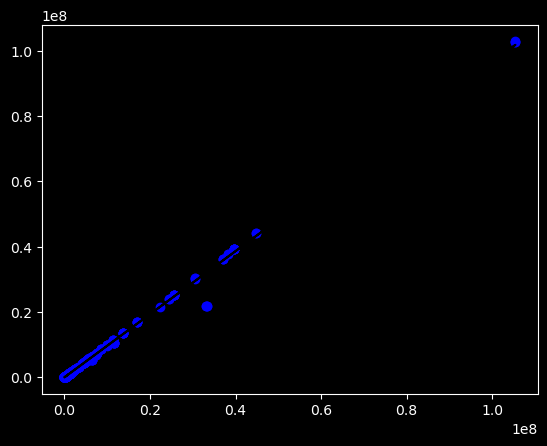

In [168]:
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

### **Conclusion**
In conclusion, the COVID-19 pandemic has affected each continent differently due to a range of factors. While some continents have experienced significant outbreaks with high infection and mortality rates, others have been able to contain the spread of the virus more effectively. The differences in government responses, healthcare systems, and access to vaccines have played a crucial role in shaping the impact of the pandemic on different continents. To effectively tackle the global pandemic, it is important to acknowledge and address these differences, and work together to ensure that resources and support are distributed equitably across all continents.

regr = linear_model.LinearRegression()
regr.fit(X, y)

### **NEW VISUALIZATION (Correlative for attributes of data)**

##### 1. Use **Heat Map** for correlative columns of data

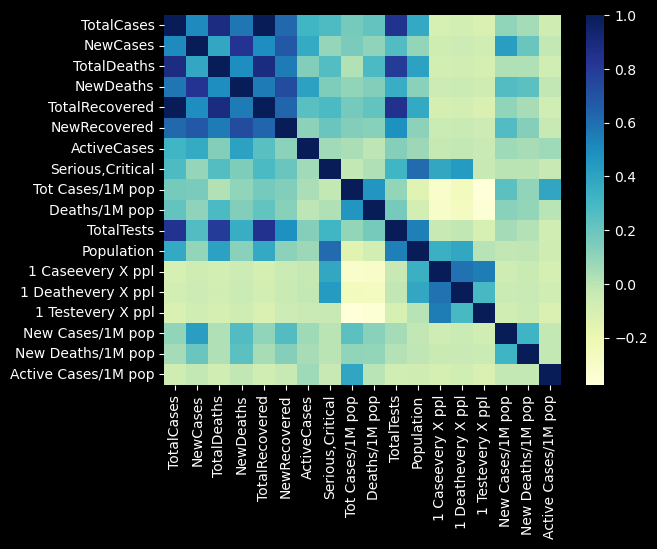

In [171]:
corr = countries_df.drop(columns = ['#']).corr()
sns.heatmap(corr, cmap = "YlGnBu")
plt.show()

The columns **TotalCases, NewCases, TotalDeaths, NewDeaths, TotalRecovered, NewRecovered, ActiveCases, Serious/Critical, and TotalTests** have a comparatively strong connection, as can be seen from the correlation heatmap of the variables. Additionally, the variables **Tot Cases/1M pop** and **Deaths/1M pop** clearly correlate with one another.

##### 2. Use **Bubble Plot** 

SyntaxError: positional argument follows keyword argument (3390818393.py, line 5)

## **NEW MODEL WITH MULTIPLES**

In [ ]:
countries_df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\r\n1M pop\r\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Date
8,1.0,China,503302,0.0,5272.0,0.0,379053.0,0.0,118977.0,7557.0,347.0,4.0,1.600000e+08,"110,461",1.448471e+09,Asia,2878.0,274748.0,9.0,0.0,0.0,82.0,2023-02-24
9,2.0,USA,105169945,8922.0,1144441.0,73.0,102567861.0,34979.0,1457643.0,2588.0,314123.0,3418.0,1.164028e+09,"3,476,731",3.348053e+08,North America,3.0,293.0,0.0,27.0,0.2,4354.0,2023-02-24
10,3.0,India,44685799,180.0,530764.0,0.0,44152945.0,106.0,2090.0,0.0,31768.0,377.0,9.183245e+08,"652,854",1.406632e+09,Asia,31.0,2650.0,2.0,1.0,0.0,1.0,2023-02-24
11,4.0,France,39608954,3917.0,164877.0,29.0,39374920.0,3293.0,69157.0,869.0,603938.0,2514.0,2.714902e+08,"4,139,547",6.558452e+07,Europe,2.0,398.0,0.0,60.0,0.4,1054.0,2023-02-24
12,5.0,Germany,38111063,20974.0,167812.0,89.0,37654800.0,0.0,288451.0,0.0,454333.0,2001.0,1.223324e+08,"1,458,359",8.388360e+07,Europe,2.0,500.0,1.0,250.0,1.0,3439.0,2023-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,218.0,Macao,3514,0.0,121.0,0.0,3392.0,0.0,1.0,0.0,5264.0,181.0,7.850000e+03,"11,760",6.674900e+05,Asia,190.0,5516.0,85.0,0.0,0.0,1.0,2023-03-10
3684,219.0,Saint Pierre Miquelon,3452,0.0,2.0,0.0,2449.0,0.0,1001.0,1.0,599410.0,347.0,2.540000e+04,"4,410,488",5.759000e+03,North America,2.0,2880.0,0.0,0.0,0.0,173815.0,2023-03-10
3685,220.0,Wallis and Futuna,3427,0.0,7.0,0.0,438.0,0.0,2982.0,0.0,312056.0,637.0,2.050800e+04,"1,867,419",1.098200e+04,Australia/Oceania,3.0,1569.0,1.0,0.0,0.0,271535.0,2023-03-10
3689,224.0,Montserrat,1403,0.0,8.0,0.0,1376.0,0.0,19.0,0.0,282578.0,1611.0,1.776200e+04,"3,577,442",4.965000e+03,North America,4.0,621.0,0.0,0.0,0.0,3827.0,2023-03-10


In [ ]:
X = pd.DataFrame(countries_df.drop(['TotalRecovered','Country,Other','Continent','Date','Tests/\r\n1M pop\r\n'],axis = 1))
y = pd.DataFrame(countries_df['TotalRecovered'])

In [ ]:
print(X.dtypes)

#                      float64
TotalCases               int64
NewCases               float64
TotalDeaths            float64
NewDeaths              float64
NewRecovered           float64
ActiveCases            float64
Serious,Critical       float64
Tot Cases/1M pop       float64
Deaths/1M pop          float64
TotalTests             float64
Population             float64
1 Caseevery X ppl      float64
1 Deathevery X ppl     float64
1 Testevery X ppl      float64
New Cases/1M pop       float64
New Deaths/1M pop      float64
Active Cases/1M pop    float64
dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
v = pd.DataFrame(regressor.coef_, index = ['Co-efficients']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [ ]:
coeff_df = pd.concat([w,v],axis=1, join = 'inner')
coeff_df

,Attribute,Co-efficients
0,#,-7.406237e-02
1,TotalCases,9.999990e-01
2,NewCases,-3.394387e-03
3,TotalDeaths,-9.999377e-01
4,NewDeaths,-7.708727e-02
5,NewRecovered,1.646108e-03
6,ActiveCases,-9.999973e-01
7,"Serious,Critical",-6.702325e-04
8,Tot Cases/1M pop,2.833388e-05
9,Deaths/1M pop,-5.098221e-03


In [ ]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred

,Predicted
0,1.519752e+04
1,1.538696e+06
2,4.561636e+06
3,1.023929e+05
4,4.244024e+04
...,...
790,4.002820e+04
791,1.110006e+06
792,1.026206e+08
793,3.166092e+06


In [ ]:
y_test 

,TotalRecovered
199,15200.0
3518,1538689.0
2017,4561623.0
1612,102393.0
3620,42438.0
...,...
3377,40030.0
815,1110006.6
503,102620644.0
1529,3166076.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))


Mean Absolute Error:  7.222152402763129
Mean Square Error:  181.04405615644612
Root Mean Square Error:  2.687406259344338
R2 Score:  0.9999999999987021
